In [1]:
# import the Libraries
import numpy as np                         #  multidimensional array
import pandas as pd                        #  to import dataset
import matplotlib.pyplot as plt            #  to display the graph

In [2]:
# import the dataset
dataset = pd.read_csv('transfusion.CSV')
X = dataset.drop(['whether he/she donated blood in March 2007'], axis = 'columns')   # attributes of the predictor
y = dataset['whether he/she donated blood in March 2007']                          # target attributes

In [3]:
# displaying the features data
X.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [4]:
# displaying the target data
y.head()

0    1
1    1
2    1
3    1
4    0
Name: whether he/she donated blood in March 2007, dtype: int64

In [5]:
# Making sure that all the features used have a good coorelation
dataset.corr()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
whether he/she donated blood in March 2007,-0.279869,0.218633,0.218633,-0.035854,1.000000


In [6]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=0)

In [7]:
# Visualization
import seaborn as sns

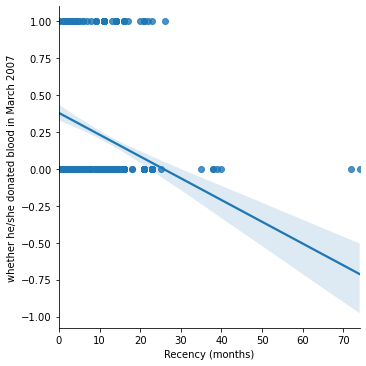

In [8]:
sns.lmplot(x = 'Recency (months)', y = 'whether he/she donated blood in March 2007', data = dataset)

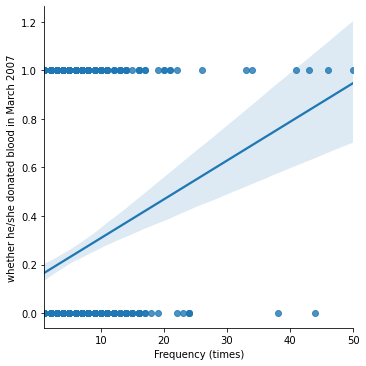

In [9]:
sns.lmplot(x = 'Frequency (times)', y = 'whether he/she donated blood in March 2007', data = dataset)

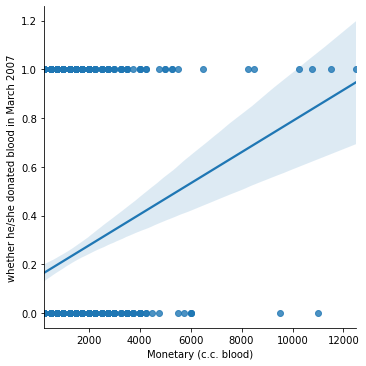

In [10]:
sns.lmplot(x = 'Monetary (c.c. blood)', y = 'whether he/she donated blood in March 2007', data = dataset)

In [11]:
# import Multinomial Naive Bayes from scikit learn
# We are using Naive Bayes because it works well with discrete value features
from sklearn.naive_bayes import MultinomialNB

In [12]:
# Fitting the data and predicting the score
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb.score(X_test, y_test)

0.76

In [13]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [14]:
X_train

array([[-0.70397737,  0.62572681,  0.62572681,  0.14236965],
       [-0.83283518, -0.07499347, -0.07499347, -0.91624507],
       [-0.96169299, -0.77571376, -0.77571376, -1.32340458],
       ...,
       [-0.31740394,  0.97608695,  0.97608695,  2.21888315],
       [-0.83283518,  0.45054674,  0.45054674,  0.63096107],
       [ 0.84231636, -0.25017355, -0.25017355, -0.0612101 ]])

In [15]:
# import support vector machine from scikit learn
from sklearn.svm import SVC

In [16]:
# init the svm model
classifier = SVC(kernel = 'rbf', C=10, gamma = 'auto')

In [17]:
# fit the training data into our SVM Classifer model
classifier.fit(X_train,y_train)

SVC(C=10, gamma='auto')

In [18]:
# making a prediction
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# confusion metric
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[102,   7],
       [ 29,  12]])

In [20]:
# accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
ac

0.76

In [21]:
# Get support vector indices
support_vector_indices = classifier.support_
print(support_vector_indices)

[  3  11  20  27  33  40  41  43  49  53  59  62  71  76  89  90  99 109
 110 120 122 124 135 138 143 145 147 148 149 152 153 160 161 166 172 173
 176 185 188 192 193 196 200 204 206 209 217 221 227 233 234 243 247 250
 253 258 259 265 272 274 277 279 280 282 285 287 289 292 293 299 301 305
 310 313 315 317 318 326 327 335 336 337 339 342 344 351 358 360 365 366
 368 371 373 374 376 378 381 384 391 393 396 401 403 404 406 412 413 417
 420 421 422 425 426 428 433 438 439 441 443 462 464 467 475 476 480 481
 482 484 485 494 495 498 500 501 504 505 506 507 510 511 513 520 523 524
 528 530 531 532 533 534 541 543 548 549 556 557 562 570 571 572 573 578
 579 583 587 592 594 595 596   0   1   4   8  13  15  18  23  26  28  30
  31  34  36  46  48  58  63  66  75  84  86  91  92 100 102 113 130 139
 162 165 168 180 181 184 186 195 198 201 210 215 216 220 226 232 238 240
 241 246 251 254 260 261 269 275 284 291 298 312 314 316 319 321 322 330
 345 347 349 350 353 355 356 357 362 364 367 372 38

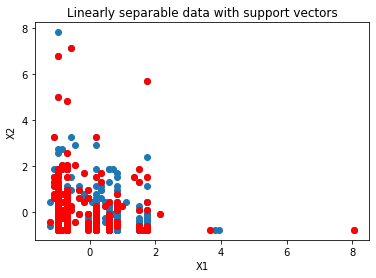

In [22]:
# Get support vectors themselves
support_vectors = classifier.support_vectors_

# Visualize support vectors 
# Schematic Diagram
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [23]:
# The reason why we get a very low accuracy is because the features given is not enough for the model to identify
# unique features and hence predict some of them inaccurately 